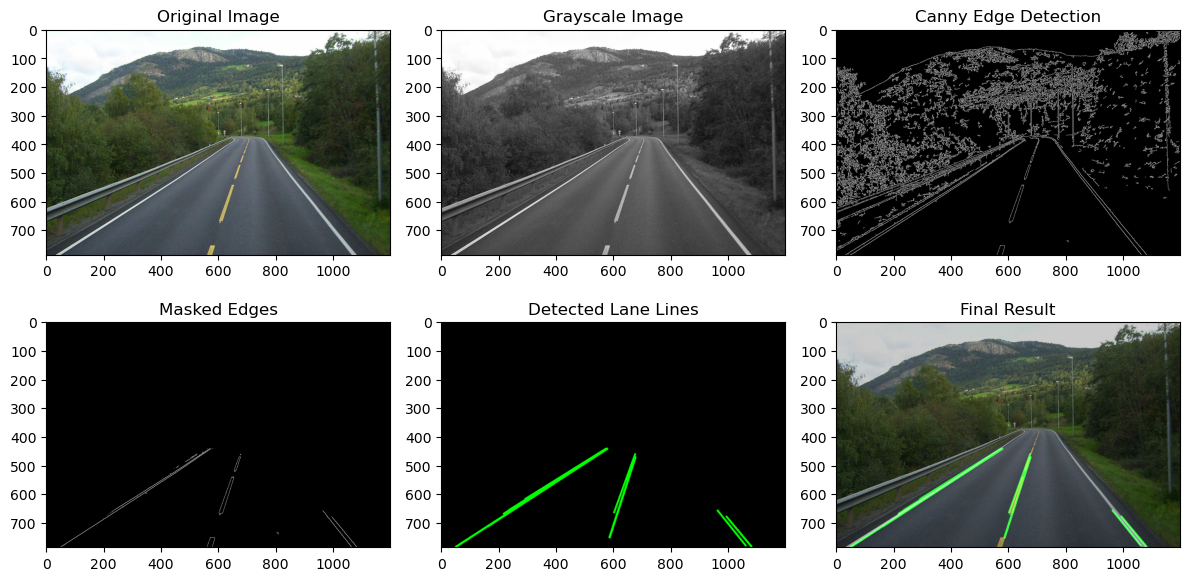

In [6]:
# Lane Detection 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Image into an array
image = cv2.imread(r"C:\Users\LENOVO\OneDrive\Desktop\Image111.jpg")

# Step 2: Grayscale Conversion
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Edge Detection using Canny function
edges = cv2.Canny(gray_image, 50, 150)

# Step 4: Highlighting the Region of Interest
# Define vertices of the region of interest (ROI)
roi_vertices = np.array([[(50, image.shape[0]), (image.shape[1] // 2 - 50, image.shape[0] // 2 + 50),
                          (image.shape[1] // 2 + 50, image.shape[0] // 2 + 50), (image.shape[1] - 50, image.shape[0])]],
                        dtype=np.int32)

# Create a mask
mask = np.zeros_like(edges)
cv2.fillPoly(mask, roi_vertices, 255)
masked_edges = cv2.bitwise_and(edges, mask)

# Step 5: Hough Transformation
lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi / 180, threshold=50, minLineLength=50, maxLineGap=100)

# Step 6: Drawing Detected Lane Lines
line_image = np.zeros_like(image)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

# Step 7: Overlay Lane Lines onto Original Image
final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Plotting the images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(2, 3, 4)
plt.imshow(masked_edges, cmap='gray')
plt.title('Masked Edges')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lane Lines')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Final Result')

plt.tight_layout()
plt.show()

